In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_gold=pd.read_csv('gold_price_data.csv')

In [3]:
data_gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data_gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
data_gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2290 entries, 2008-01-02 to 2018-05-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 171.9 KB


In [7]:
data_gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


dari sini kita dapat mengetahui bahwa SPX memiliki std paling tinggi dibandingkan yang lain, hal ini bisa dikatakan
bahwa SPX memiliki penyebaran data yang bisa saja sangat bervariasi, dan mungkin dikasus ini benar dibuktikan bahwa SPX can be so fluktuatif, maybe many faktor to be due, instead politics, global.
such as respon of moneter polcy report of profit company nad many happend in the global situation

if you good to fight with challange with this situation you can choosed the SPX from the other.

but in this case iwanna deep explained with the gold case, from the data, we know about price of gold its trend stabil of price
and the std of gold is the lowest, it can be said that gold is the most stable asset, also from the data among min and max value in this report --> the difference can still accept with mind, 70, 109,120,132,184 if you wanna pair with the other in this data

# Visualisasi EDA

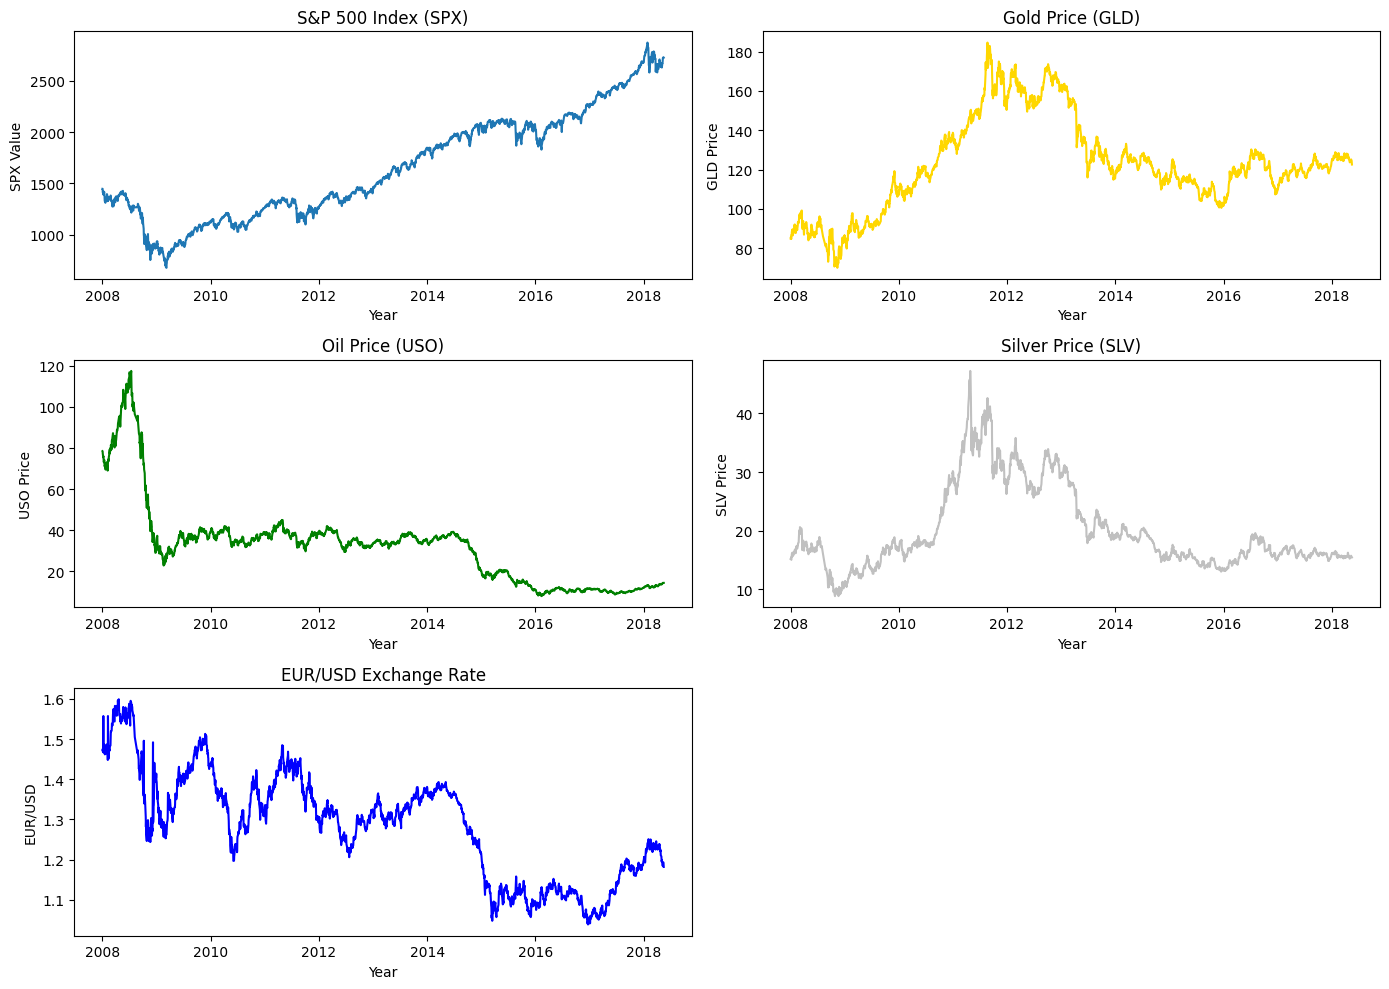

In [8]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format for proper time series analysis
data_gold['Date'] = pd.to_datetime(data_gold['Date'])

# Set 'Date' as the index for easier plotting
data_gold.set_index('Date', inplace=True)

# Plotting the time series for each variable
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(data_gold.index, data_gold['SPX'])
plt.title('S&P 500 Index (SPX)')
plt.xlabel('Year')
plt.ylabel('SPX Value')

plt.subplot(3, 2, 2)
plt.plot(data_gold.index, data_gold['GLD'], color='gold')
plt.title('Gold Price (GLD)')
plt.xlabel('Year')
plt.ylabel('GLD Price')

plt.subplot(3, 2, 3)
plt.plot(data_gold.index, data_gold['USO'], color='green')
plt.title('Oil Price (USO)')
plt.xlabel('Year')
plt.ylabel('USO Price')

plt.subplot(3, 2, 4)
plt.plot(data_gold.index, data_gold['SLV'], color='silver')
plt.title('Silver Price (SLV)')
plt.xlabel('Year')
plt.ylabel('SLV Price')

plt.subplot(3, 2, 5)
plt.plot(data_gold.index, data_gold['EUR/USD'], color='blue')
plt.title('EUR/USD Exchange Rate')
plt.xlabel('Year')
plt.ylabel('EUR/USD')

plt.tight_layout()
plt.show()


we gain alot of information from this line from 2008-2018 of 5 the (SPX,USO,EUR/USA,Gold and silver)

every mine always fluktuatif, maybe on the stabil area just silver and gold which conditions its not too difference if its pair with the other on time series case of course

condition SPX trend always to consistent increase, maybe sharp decrease in 2008 due to global crisis
not just SPX in this data to consistent decrease in 2008

we know this mine in gold and silver, they have so increase maybe after global crisis, every investor want gain safe aset area, and then they choosed the gold and silver for it


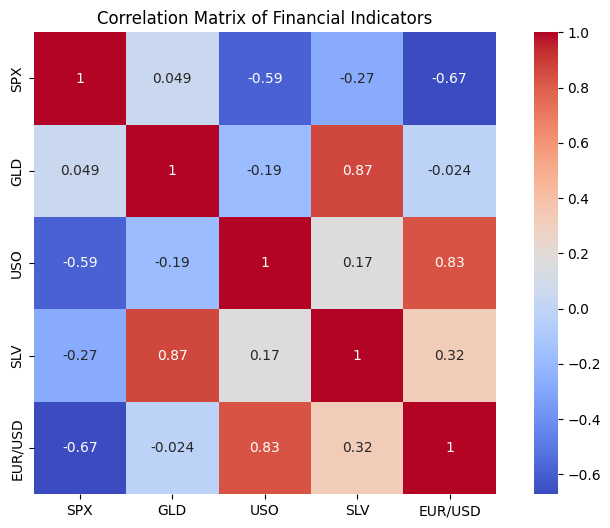

In [9]:
# Correlation headmap
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_gold.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Financial Indicators')
plt.show()


deks S&P 500 memiliki korelasi negatif yang cukup kuat dengan nilai tukar EUR/USD. Ini menunjukkan bahwa ketika pasar saham AS (SPX) menguat, nilai Euro terhadap Dolar AS cenderung melemah, dan sebaliknya.

Harga emas (GLD) memiliki korelasi positif yang sangat kuat dengan harga perak (SLV). Ini masuk akal karena kedua logam ini sering dianggap sebagai aset safe-haven dan harganya sering bergerak sejalan.

Terdapat korelasi negatif yang cukup kuat antara indeks S&P 500 dan harga minyak (USO). Ini menunjukkan bahwa ketika pasar saham menguat, harga minyak cenderung turun, atau sebaliknya. Ini bisa dipengaruhi oleh berbagai faktor ekonomi seperti permintaan energi yang berfluktuasi sesuai dengan kondisi ekonomi global.

In [1]:
# make the model

from pycaret.regression import *


In [16]:
# Setup PyCaret environment
exp_reg = setup(data=data_gold, 
                target='GLD',
                ignore_features='Date', 
                normalize=True,
                normalize_method='minmax', # Normalisasi data
                session_id=123) # Memastikan hasil yang konsisten# Membandingkan model yang terbaik



,Description,Value
0,Session id,123
1,Target,GLD
2,Target type,Regression
3,Original data shape,"(2290, 6)"
4,Transformed data shape,"(2290, 5)"
5,Transformed train set shape,"(1603, 5)"
6,Transformed test set shape,"(687, 5)"
7,Ignore features,4
8,Numeric features,4
9,Preprocess,True


In [17]:
best_model=compare_models()

C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [18]:
from pycaret.regression import create_model
model_rf=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7471,8.6824,2.9466,0.9839,0.0227,0.0142
1,1.3984,5.8046,2.4093,0.9912,0.0186,0.0116
2,1.5613,7.8642,2.8043,0.9833,0.0213,0.0128
3,1.3205,5.7691,2.4019,0.9891,0.0181,0.0109
4,1.5732,13.4425,3.6664,0.9740,0.0253,0.0122
5,1.6058,8.5771,2.9287,0.9847,0.0217,0.0129
6,1.3927,5.4348,2.3313,0.9896,0.0169,0.0112
7,1.4111,7.6328,2.7628,0.9854,0.0200,0.0112
8,1.4984,6.8649,2.6201,0.9869,0.0186,0.0115


In [19]:
# Hyperparameter tuning
parameter_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Tuning model
hyper_rf_model = tune_model(model_rf,
                            search_library='scikit-learn',
                            search_algorithm='grid',
                            custom_grid=parameter_grid)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
242 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AXIOO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

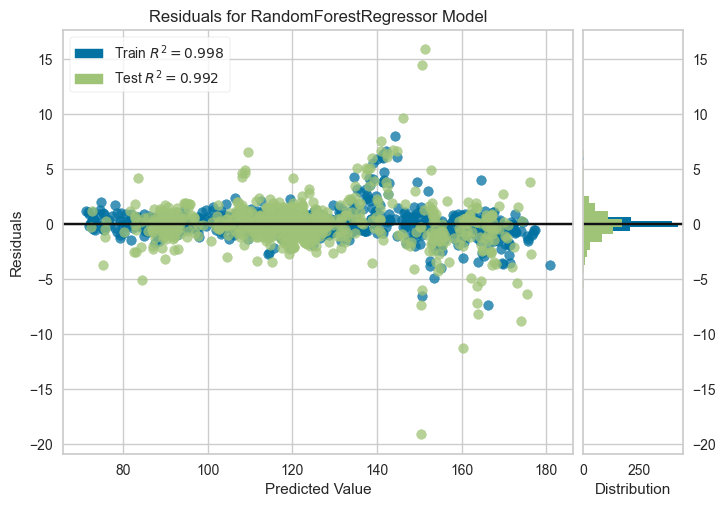

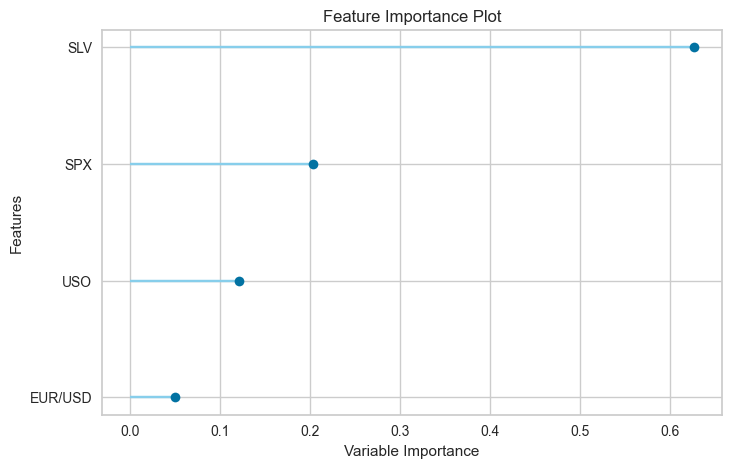

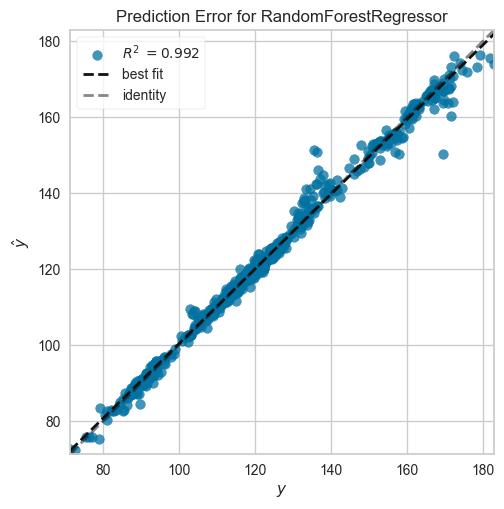

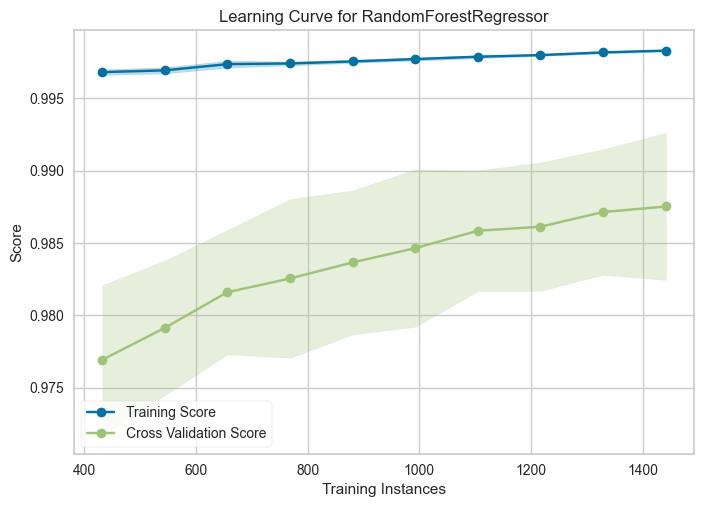

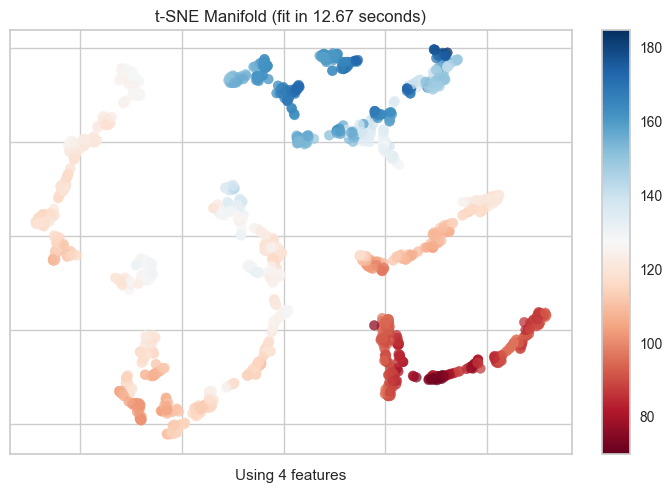

In [21]:
plot_model(hyper_rf_model, plot='residuals')
plot_model(hyper_rf_model, plot='feature')
plot_model(hyper_rf_model, plot='learning')
plot_model(hyper_rf_model, plot='manifold')

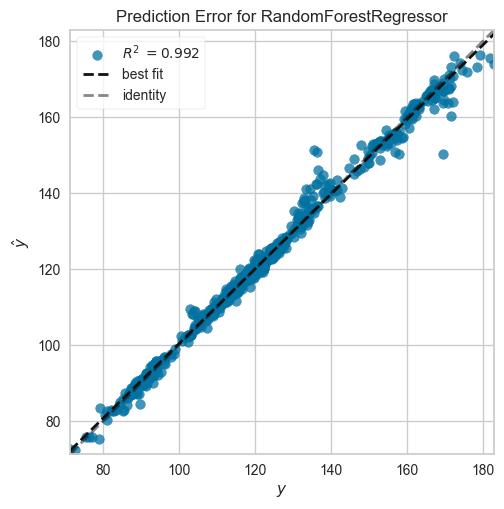

In [22]:
plot_model(hyper_rf_model, plot='error')

Data Points (Blue Dots): Each blue dot represents a pair of true and predicted values. The closer these points are to the identity line (diagonal dashed line), the better the model's predictions match the true values.

Best Fit Line (Dashed Line): This line represents the linear regression fit of the predicted values against the true values. If the model is perfect, this line would coincide with the identity line.
we know in best fit line refresentatif and show about of mean all of predicted model, thats mean show how model can be works for all of data

R2Value (0.992): This value, known as the coefficient of determination, indicates the proportion of the variance in the true values that is predictable from the predicted values. An 𝑅2 value of 0.992 suggests that the model explains 99.2% of the variance, indicating very high accuracy.

In [26]:
#save Model
from pycaret.regression import save_model
save_model(hyper_rf_model, 'model_regresi_of_gold')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SPX', 'USO', 'SLV', 'EUR/USD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  RandomForestRegressor(max_depth=30, max_features='sqrt',
                                        n_estimators=500, n_jobs=-1,
                                        random_state=123))]),
 'model_regresi_of_gold.pkl')

In [25]:
from sklearn.model_selection import train_test_split
# Splitting the data into features and target
X = data_gold.drop(columns=['GLD'])
y = data_gold['GLD']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load the model


In [27]:
from pycaret.regression import load_model
load_model=load_model('model_regresi_of_gold')



Transformation Pipeline and Model Successfully Loaded


# Predicted model

In [30]:
from pycaret.regression import predict_model

prediction_GLD=predict_model(load_model, data=X_test)

prediction_GLD.head()



,Date,SPX,USO,SLV,EUR/USD,prediction_label
2178,11/24/2017,2602.419922,11.790000,16.080000,1.185396,122.400460
1271,10/24/2013,1752.069946,34.990002,21.870001,1.380396,130.035916
1268,10/21/2013,1744.660034,35.939999,21.410000,1.367596,127.321182
44,3/6/2008,1304.339966,83.889999,20.075001,1.538509,96.747440
2025,3/2/2017,2381.919922,11.170000,16.799999,1.053585,117.638541


In [31]:
y_test

2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
993     152.149994
2175    121.309998
1057    162.600006
1064    167.100006
261      94.349998
Name: GLD, Length: 687, dtype: float64

buat array untuk visualisasi perbandingan model data actual dan prediksi

In [33]:
import numpy as np
prediction_GLD_array=prediction_GLD['prediction_label'].to_numpy()

prediction_GLD_array

array([122.40045992, 130.03591594, 127.32118237,  96.74743968,
       117.63854138, 114.86310004, 125.11299707, 117.4614406 ,
       108.11136105,  98.87218118,  97.3317222 , 168.23973636,
       149.07693927, 116.18433728, 170.03780112,  85.43815833,
       122.42729941, 108.79325816, 111.62529836, 131.3884846 ,
       124.58358113, 114.07150125, 117.06355766, 109.12499986,
       110.55137975, 125.91040042, 122.78087936, 114.12013768,
       113.13872186, 126.40678014, 146.60647702,  89.80984138,
       167.36909937, 114.48244179, 114.50336044, 120.42768172,
       140.8486577 , 160.97451663, 172.66621814, 153.29544122,
       117.65563992, 113.39700098, 121.40063799, 113.57612047,
       121.74734653, 107.76975798,  87.59431917, 114.38424146,
       130.16143878, 118.40578043, 101.21113882, 129.56172232,
       106.62075809, 160.57344516, 129.64505988, 116.79550148,
       144.91762067, 135.23414098,  95.52778226, 124.29830122,
       116.16148135,  86.0528989 , 104.40795869, 114.08

buat tabel data frame baru untuk data y_prediksi dan y_test nya

In [38]:
import pandas as pd
y_pred=pd.Series(prediction_GLD_array,index=y_test)

In [39]:
y_pred.head()

GLD
122.320000    122.400460
129.899994    130.035916
126.980003    127.321182
96.500000      96.747440
117.580002    117.638541
dtype: float64

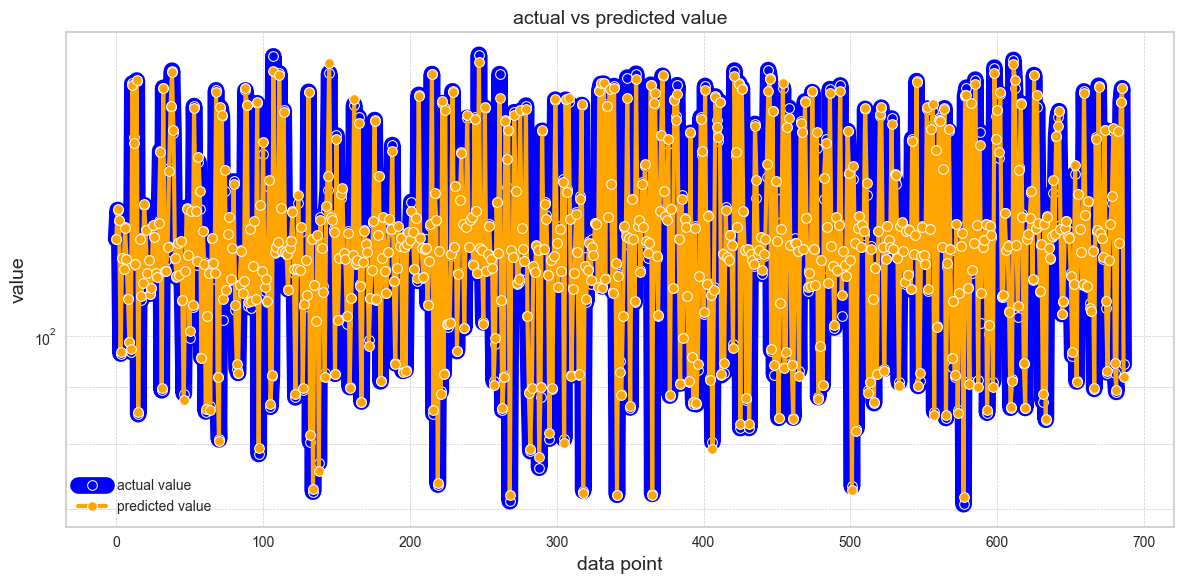

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))# untuk membuat ukuran figure visualisasinya

#membuat garis 
sns.lineplot(x=np.arange(len(y_test)), y=y_test,marker='o', label='actual value',color='blue',linewidth=12)
sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, marker='o',label='predicted value', color= 'orange',linewidth=3)

plt.yscale('log') # menampilkan nilai logaritma
plt.grid(True,which='both',linestyle='--',linewidth=0.5) # untuk membuat grid di gambar agar memudahkan untuk membaca

#menambahkan label sumbuh dan judul
plt.xlabel('data point',fontsize=14)
plt.ylabel('value',fontsize=14)
plt.title('actual vs predicted value',fontsize=14)

plt.tight_layout()
plt.show()
